<a href="https://colab.research.google.com/github/mkimhi/Binary-Code-Optimization-C-/blob/master/RL_Tutorial_3_policy_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import random
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import gym
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
plt.style.use('ggplot')

# Policy evaluation
---
In the lectures you learned about model-free predictions and ways to evaluate policy $\pi$.

**Model free**: no knowledge of MDP transitions / rewards

#### **Policy evaluation**: Given a policy $\pi$, we would like to learn $v_{\pi}$ (The value function for the policy) from episodes of experience.

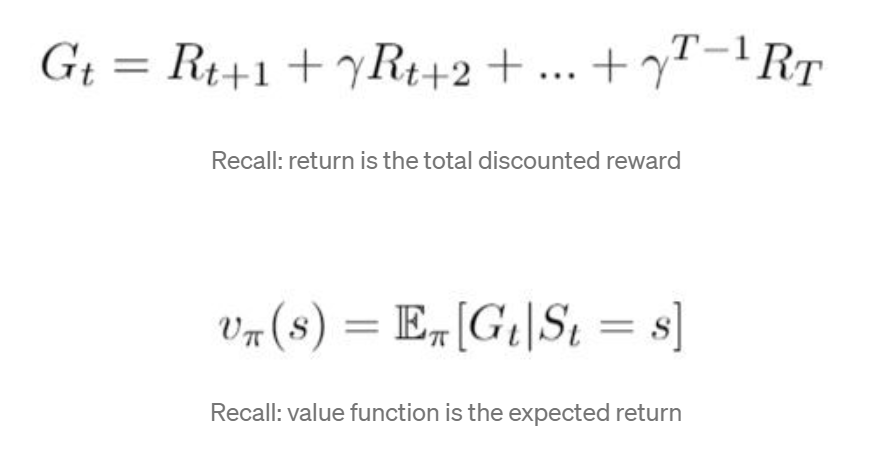

In this tutorial we are going to dive into three ways:

* Monte-Carlo Learning

* Temporal-Difference Learning

* TD(λ)

### **Monte-Carlo**
---


Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle.

Let's do a small example to evaluate the value of $\pi$ by the ratio between square and cicrle.

First, from symmetry prespective, we know that the ratio remain the same for a quarter of the sqare. so we can use the same amount of samples for a quarter of the erea.

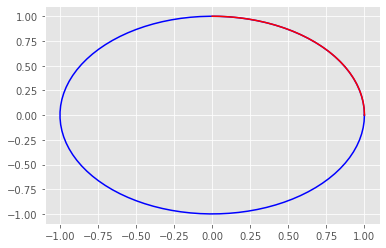

In [ ]:
arc = np.linspace(0, 2*np.pi, 100)
plt.plot(1*np.cos(arc), 1*np.sin(arc),'b')

arc = np.linspace(0, np.pi/2, 100)
plt.plot(1*np.cos(arc), 1*np.sin(arc),'r')

Now, let's generate random points at this 1*1 sqeare.

let's check if a given point is in the circle

then using the ratio of points that in the square and in the cicrle, compute $\pi$

In [ ]:
def generate_points(size):
    x = random.random()*size
    y = random.random()*size
    return (x, y)

def is_in_circle(point, size):
    return math.sqrt(point[0]**2 + point[1]**2) <= size

def compute_pi(points_inside_circle, points_inside_square):
    return 4 * (points_inside_circle / points_inside_square) 

Approximate value of pi is 2.88


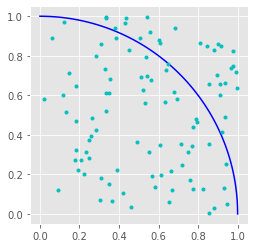

In [ ]:
square_size = 1
points_inside_circle = 0
points_inside_square = 0
sample_size = 100
arc = np.linspace(0, np.pi/2, 100)

plt.axes().set_aspect('equal')
plt.plot(1*np.cos(arc), 1*np.sin(arc),'b')


for i in range(sample_size):
     point = generate_points(square_size)
     plt.plot(point[0], point[1], 'c.')
     points_inside_square += 1
        
     if is_in_circle(point, square_size):
         points_inside_circle += 1

print(f"Approximate value of pi is {compute_pi(points_inside_circle, points_inside_square)}")

# **Monte-Carlo Learning**

Monte Carlo (MC) methods are model-free which learn directly from episodes of experience. Monte Carlo learns from complete episodes.

One drawback to MC is that it can only apply to episodic Markov Decision Processes where all episodes must terminate.

**Monte-Carlo policy evaluation** uses empirical mean return instead of expected return. Two approaches to evaluate the value function of a policy at a state:
* First-Visit Monte-Carlo Policy Evaluation 
* Every-Visit Monte-Carlo Policy Evaluation


### **First-Visit Monte-Carlo Policy Evaluation**

Evaluate the value of state s of a given policy.

The first time-step (t) that state (s) is visited in an episode:

* Increment counter: $N(s) ← N(s) + 1$

* Increment total return: $S(s) ← S(s) + G_t$

* Value is estimated by mean return: $V(s) = S(s)/N(s)$

* $V(s) → v_π(s) \text{  as  } N(s) → ∞$

### **Every-Visit Monte-Carlo Policy Evaluation**

Evaluate the value of state s of a given policy

Every time-step (t) that state (s) is visited in an episode:

* Increment counter: $N(s) ← N(s) + 1$
* Increment total return: $S(s) ← S(s) + G_t$
* Value is estimated by mean return: $V(s) = S(s)/N(s)$
* $V(s) → v_π(s) \text{ as } N(s) → ∞$

In both of the above evaluation approaches, we had to track the statistics of our algorithm. i.e we can only compute the value after we have completed all the episodes.

To solve this problem we can use the Incremental Mean equation to update the value incrementally.

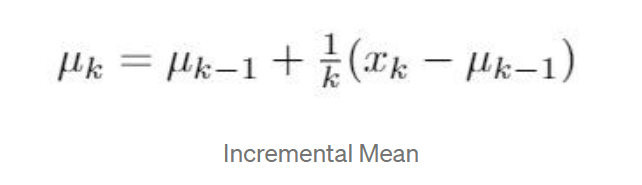

### Incremental Monte-Carlo Updates

Update V(s) incrementally after episode $S_1, A_1, R_1, …, S_t$. For each state $S_t$ with return $G_t$ :

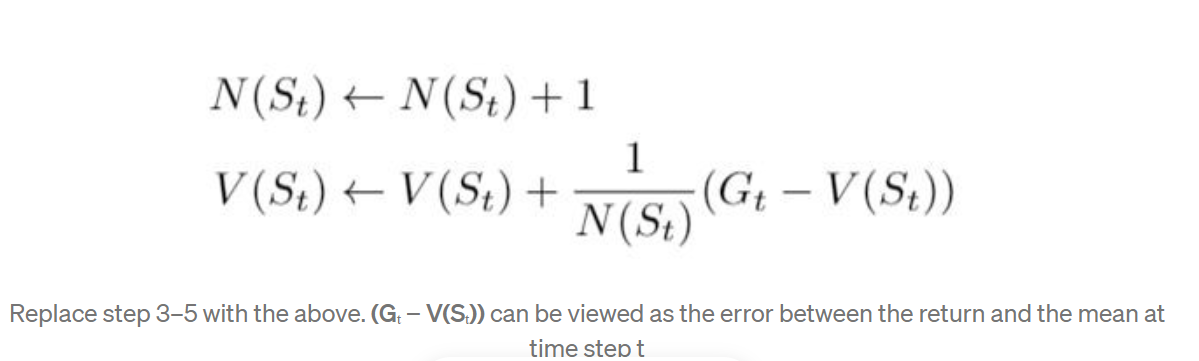

We can relax the update in non-stationary problems to running mean 

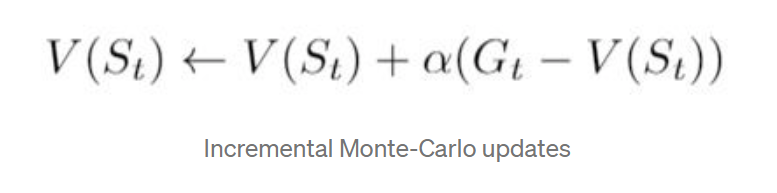

# Playing BlackJack with First Visit MC
---

First, create enviroment from gym

you can [read the env class](https://github.com/rhalbersma/gym-blackjack-v1/blob/master/src/gym_blackjack_v1/envs/blackjack_v1.py)

In [ ]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Then we define the policy function which takes the current state and check if the score is greater than or equal to 20, if yes we return 0 else we return 1. i.e If the score is greater than or equal to 20 we stand (0) else we hit (1)

In [ ]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Now we generate epsiode (one game)...

In [ ]:
def generate_episode(policy, env):
    
    # we initialize the list for storing states, actions, and rewards
    states, actions, rewards = [], [], []
    
    # Initialize the gym environment
    observation = env.reset()
    
    while True:
        
        # append the states to the states list
        states.append(observation)
        
        # now, we select an action using our sample_policy function and append the action to actions list
         
        action = sample_policy(observation)
        actions.append(action)
        
        # We perform the action in the environment according to our sample_policy, move to the next state 
        # and receive reward
        observation, reward, done, info = env.step(action)
        rewards.append(reward)
        
        # Break if the state is a terminal state
        if done:
             break
                
    return states, actions, rewards

Now that we learned how to generate an episode, we will see how to perform First Vist MC Prediction

In [ ]:
def first_visit_mc_prediction(policy, env, n_episodes):
    
    # First, we initialize the empty value table as a dictionary for storing the values of each state
    value_table = defaultdict(float)
    N = defaultdict(int)

    
    for _ in range(n_episodes):
        
        # Next, we generate the epsiode and store the states and rewards
        states, _, rewards = generate_episode(policy, env)
        returns = 0
        
        # Then for each step, we store the rewards to a variable R and states to S, and we calculate
        # returns as a sum of rewards
        
        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]
            
            returns += R
            
            # Now to perform first visit MC, we check if the episode is visited for the first time, if yes,
            # we simply take the average of returns and assign the value of the state as an average of returns
            
            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    
    return value_table

In [ ]:
value = first_visit_mc_prediction(sample_policy, env, n_episodes=500000)

Let's look at some elements of the value function

In [ ]:
for i in range(10):
  print(value.popitem())

((4, 5, False), -0.4999999999999998)
((5, 5, False), -0.5379746835443041)
((12, 1, True), -0.4051724137931035)
((4, 7, False), -0.4568965517241378)
((13, 1, True), -0.4871244635193134)
((14, 1, True), -0.4662576687116561)
((12, 7, True), -0.16981132075471703)
((12, 8, True), -0.07500000000000004)
((14, 6, True), -0.2682445759368835)
((13, 4, True), -0.27754237288135586)


Let's look at our value function over the state space, seperate to when we reuse aces.

In [ ]:
from matplotlib import cm

def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]
    
    X, Y = np.meshgrid(player_sum, dealer_show)
    my_col = [cm.jet(state_values[:, :, 0]/np.amax(state_values[:, :, 0]))]
    my_col+= [cm.jet(state_values[:, :, 1]/np.amax(state_values[:, :, 1]))]

    ax1.plot_surface(X, Y, state_values[:, :, 0],cmap=cm.jet,rstride=1, cstride=1)
    ax2.plot_surface(X, Y, state_values[:, :, 1],cmap=cm.jet,rstride=1, cstride=1)
 
    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')

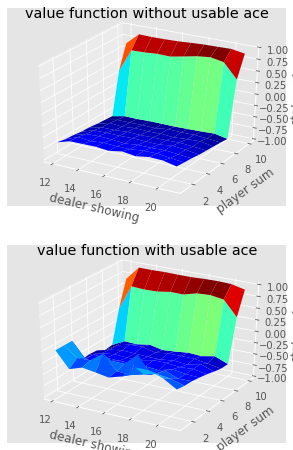

In [ ]:
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])

We can compare state-wise beterrn those surfaces and one's who belong to a diffrent policy...

# **Temporal-Difference Learning**
---

Temporal-Difference is model-free. Temporal Difference methods learn directly from experience / interaction with the environment. Temporal Difference learns from incomplete episodes, by *bootstrapping* (update the guess of the value function).

In both MC and TD the goal is to learn $v_{\pi}$ online from experience under policy $\pi$

Recall, we used $G(s)$ for MC policy evaluation of the value function.

Means, we need to finish an episode that visit state $s$.

Temporal-difference learning algorithm does not have to finish the episode, but can estimate with the next stats.
TD(0) differs as we update the value $V(S_t)$ towards an estimated return $R_{t+1} + γV(S_{t+1})$

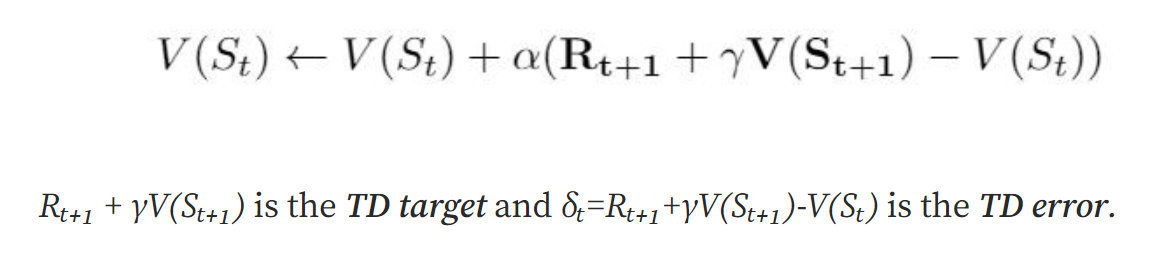

TD learning updates the value function immediately which allows it to learn before knowing the final outcome after every step unlike MC which must wait until the end of the episode before the return is known. TD works in continuing (non-terminating) environments while MC only works for episodic (terminating) environments / complete sequences.

#### There is a trade-off between the bias and the variance.

**MC** has a high variance and zero bias as it uses the return Gₜ which depends on many random actions, transitions and rewards. Therefore it has good convergence properties even with the function approximation and is not sensitive to initial value.

**TD** has low variance and some bias as the TD target depends on one random action, transition and reward. It is usually more efficient than MC. TD(0) converges to $v_π(s)$ but not always with function approximation. Unlike MC it is more sensitive to the initial value.

In practice, we do not have infinite number of examples.

Let's look at an example of the convergence of both algorithms

The following example has 2 states and 8 episodes:

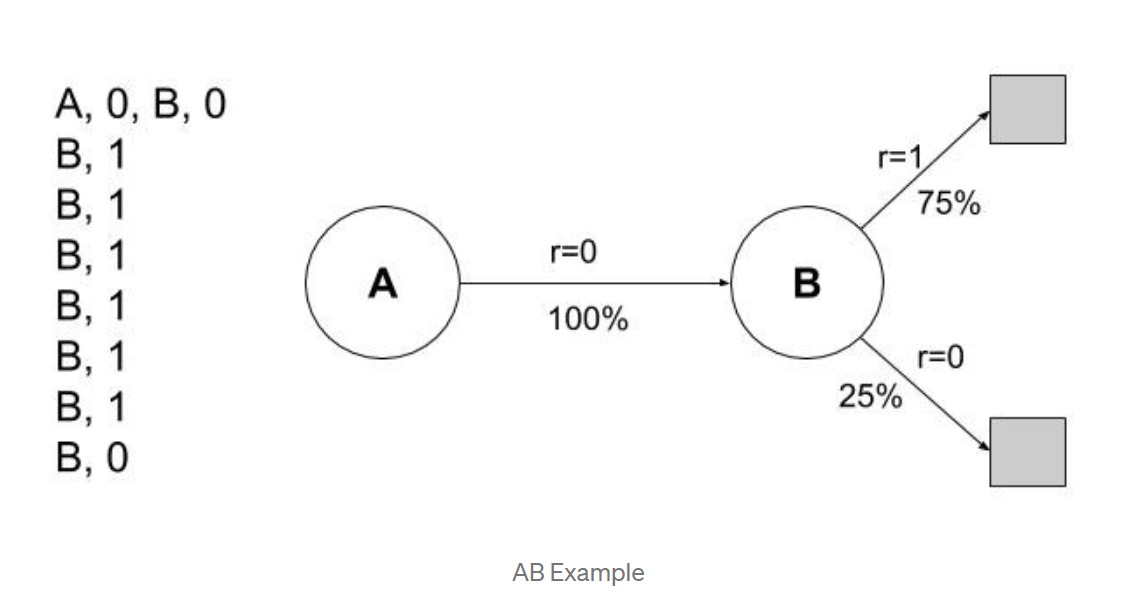

**MC** converges to solution which best fits the observed returns with minimum mean-squared error

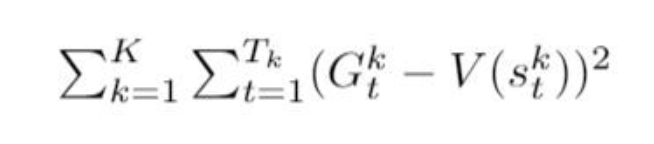


thus $V(B)=0.75$ and $V(A)=0$, since the only observation of A yeilds 0



**TD(0)** converges to solution of max likelihood Markov model. It is the solution to the MDP that best fits the data

once can see that $V(A)=V(B)=0.75$


# **TD(λ)**
---

n-Step Return
An approach between TD(0) and MC, where we have n-step temporal-difference learning. Therefore the value will be computed by looking ahead n-steps and apply the temporal-difference learning method.

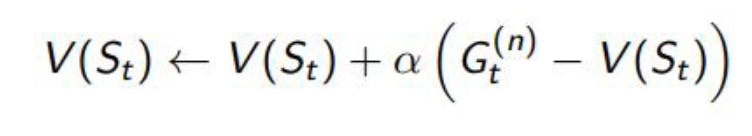

Instead of looking at each n-step return $Gₜ⁽ⁿ⁾$, we can use a decaying weighted sum to combine all n-step returns called the λ-return.

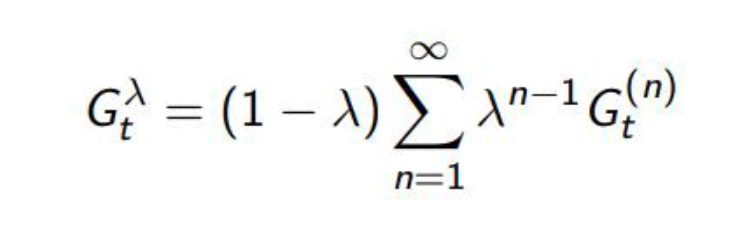

And the value can be viewd as

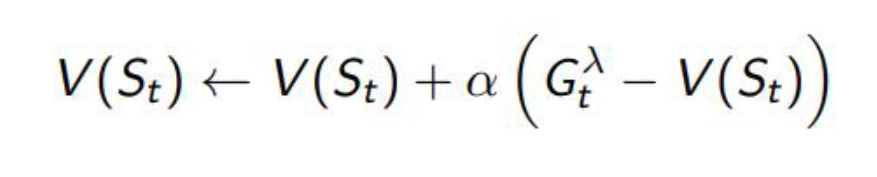

#### Backward-view TD(λ)
The backward-view provides mechanism to update the value online, every step, from incomplete sequences. We keep an eligibility trace for every state s and update the V(s) for every state s in proportion to TD-error δₜ and eligibility trace Eₜ(s).

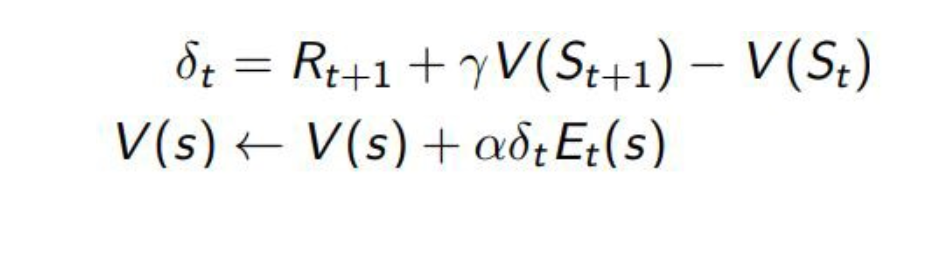

#### **Eligibility Trace**

Eligibility traces combine both frequency heuristic and recency heuristic.
- Frequency heuristic: assign credit to most frequent states
- Recency heuristic: assign credit to most recent states

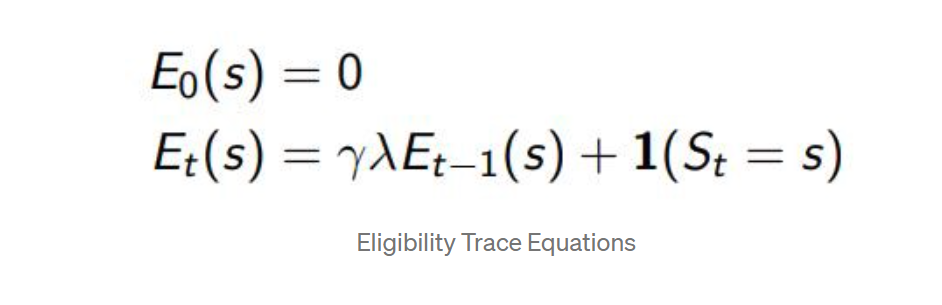

We have looked at various methods for model-free predictions such as Monte-Carlo Learning, Temporal-Difference Learning and TD(λ). These methods allowed us to find the value of a state when given a policy.

#### credits
---
This tutorial was written by Moshe Kimhi

[Model-Free Prediction](https://towardsdatascience.com/model-free-prediction-reinforcement-learning-507297e8e2ad) - Ryan Wong

[Hands-On Reinforcement Learning With Python](https://www.amazon.com/dp/B079Q3WLM4/ref=sr_1_1?ie=UTF8&qid=1518175121&sr=8-1&keywords=hands+on+reinforcement+learning+with+python) - Sudharsan Ravichandiran